In [18]:
import pandas as pd
import numpy as np
import spacy
import nltk
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

In [19]:
PSS = pd.DataFrame(pd.read_csv(r'../LolDataCleaned.csv'))
PSS.head()

,StartDate,EndDate,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,DistributionChannel,UserLanguage,Rank,...,Q8_11,OpenChanges,BalancePriority _1,BalancePriority _2,BalancePriority _3,BalancePriority _4,BalancePriority _5,BalancePriority _6,BalancePriority _7,OtherChanges
0,2023-12-07 13:48:20,2023-12-07 13:50:45,100,144,True,2023-12-07 13:50:45,R_3subBtC5g7c4Wxd,anonymous,EN,Platinum - Diamond,...,Somewhat agree,I would force every player to uninstall the ga...,2,1,4,3,5,6,7,NaN
1,2023-12-07 13:47:48,2023-12-07 13:51:22,100,213,True,2023-12-07 13:51:23,R_1q51xpgFhkylz0o,anonymous,EN,Platinum - Diamond,...,Neither agree nor disagree,"Nerf tank shredding tools, armor pen and %hp d...",1,2,4,6,7,5,3,Nerf/Fix bounties to be more consistent and in...
2,2023-12-07 13:48:32,2023-12-07 13:51:53,100,201,True,2023-12-07 13:51:54,R_3kokwpJdjKzn4FZ,anonymous,EN,Platinum - Diamond,...,Somewhat agree,"Reduce the amount of dashes, cc and overall ov...",3,2,1,7,4,5,6,Increasing healing reduction just like it was ...
3,2023-12-07 13:47:19,2023-12-07 13:51:56,100,276,True,2023-12-07 13:51:57,R_2DN9Qkb3Wn7LuiC,anonymous,EN,Platinum - Diamond,...,Somewhat agree,NaN,2,4,1,5,3,6,7,Nerf riven and hwei and not make new champs br...
4,2023-12-07 13:46:53,2023-12-07 13:52:05,100,312,True,2023-12-07 13:52:05,R_RJfCcty4hT40eI1,anonymous,EN,Platinum - Diamond,...,Somewhat agree,I would like fights and lane phases to last lo...,2,6,5,3,1,7,4,NaN


Next, we have some open ended questions and responses in the survey, These responses need to be cleaned, tokenized, parsed, and fed into an algorithm to code and extract their meaning.

In [20]:
#load the English Tokenizer, Tagger, Parser, NER and Word Vectors.
nlp = spacy.load('en_core_web_sm')
#Print our column names again for later reference.
print(PSS.columns)

Index(['StartDate', 'EndDate', 'Progress', 'Duration (in seconds)', 'Finished',
       'RecordedDate', 'ResponseId', 'DistributionChannel', 'UserLanguage',
       'Rank', 'Gender', 'MainRole', 'MainedChamp', 'Veterancy', 'PlayerStats',
       'Q8_1', 'Q8_2', 'Q8_3', 'Q8_4', 'Q8_5', 'Q8_6', 'Q8_7', 'Q8_8', 'Q8_9',
       'Q8_10', 'Q8_11', 'OpenChanges', 'BalancePriority _1',
       'BalancePriority _2', 'BalancePriority _3', 'BalancePriority _4',
       'BalancePriority _5', 'BalancePriority _6', 'BalancePriority _7',
       'OtherChanges'],
      dtype='object')


The Columns which contain the response text we want to have our algorithm is OpenChanges and Other Changes, the MainRole and MainedChamp also contain open responses that it might be useful to have our algorithm examine as well.

In [21]:
tokens = [] #holds tokens
for response in PSS['OpenChanges']:
    if isinstance(response, str):
        doc = nlp(response)
        tokens.extend([token.lemma_ for token in doc if not token.is_stop and not token.is_punct and not token.is_space])

freq_dist = FreqDist(tokens)
common_words = freq_dist.most_common(150)

print(common_words)


[('game', 38), ('remove', 21), ('champion', 19), ('like', 15), ('change', 14), ('lane', 13), ('item', 12), ('play', 12), ('nerf', 11), ('reduce', 11), ('new', 11), ('role', 10), ('jungle', 10), ('damage', 9), ('ability', 9), ('champ', 9), ('bring', 8), ('support', 8), ('player', 7), ('time', 7), ('ban', 7), ('well', 7), ('map', 7), ('ad', 7), ('rework', 7), ('bot', 7), ('laner', 6), ('adc', 6), ('delete', 6), ('revert', 6), ('rank', 6), ('not', 6), ('season', 6), ('fight', 5), ('balance', 5), ('way', 5), ('high', 5), ('AP', 5), ('ADC', 5), ('impact', 5), ('improve', 5), ('dash', 4), ('certain', 4), ('2', 4), ('year', 4), ('fix', 4), ('hard', 4), ('make', 4), ('take', 4), ('old', 4), ('buff', 4), ('able', 4), ('gold', 4), ('add', 4), ('think', 4), ('mode', 4), ('try', 4), ('feel', 4), ('1', 4), ('assassin', 4), ('5', 4), ('get', 4), ('e', 4), ('increase', 4), ('cooldown', 4), ('rune', 4), ('bit', 4), ('mid', 4), ('tank', 3), ('overall', 3), ('kit', 3), ('release', 3), ('long', 3), ('mea

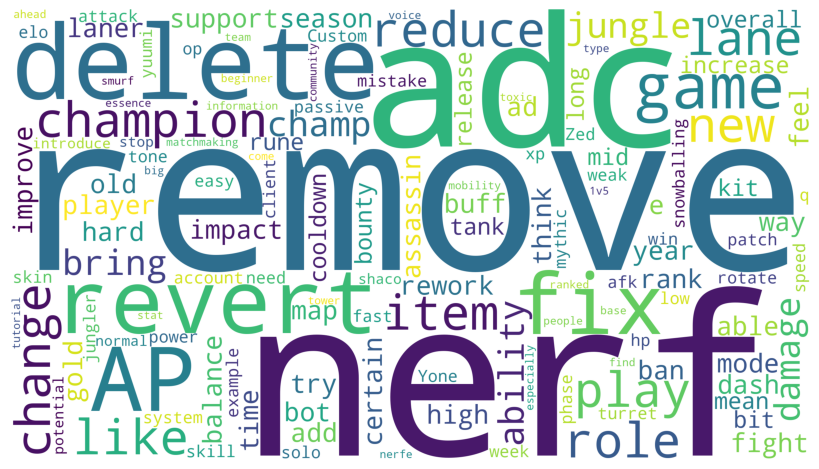

In [23]:
#Word Cloud
from spacy.lang.en.stop_words import STOP_WORDS
wordcloud_string = ' '.join([word for word, _ in common_words])

wordcloud = WordCloud(width = 2560, height = 1440, 
                background_color ='white', 
                stopwords = STOP_WORDS, 
                min_font_size = 12).generate(wordcloud_string)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()

In [24]:
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')

responses = PSS['OpenChanges']

# Extract key phrases
key_phrases = []
for response in responses:
    if isinstance(response, str):
        blob = TextBlob(response)
        key_phrases.extend(blob.noun_phrases)

print(key_phrases)
freq_dist2 = FreqDist(key_phrases)
common_phrases = freq_dist2.most_common(100)
print(common_phrases)

PSS["OpenChangesSummary"] = key_phrases

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jfsal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\jfsal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\jfsal\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


['nerf', 'armor pen', '% hp damage', 'reduce', 'new champion', 'lane phases', 'neutral objectives', 'hots', 'champion rotation', 'mtgarena', 'certain set', 'bullshit champions', 'recent years', 'bring', 'fixing the client', 'game designer', 'zilean', 'fix client', 'propper custom', 'adcs', 'literally everyone', 'bring', 'bounty system', 'old shaco', 'stop', 'braindead shitskins', "n't bug", 'new patches', 'intermediate players', "'d buff", "vel'koz", 'custom', 'custom', 'toxic people', 'view character abilities', 'training options', 'specific items', 'comprehensive stat', 'item breakdowns', 'gold minions', 'champ kills', 'game client', 'game types', 'quicker game types', 'easy stress', 'free way', 'test champions', 'delete yone', 'co-op', 'odyssey', 'game modes', 'casual player base', 'new players', 'game mechanics', 'revert', 'item changes', 'bring', 'swain', 'bring', 'duo q', 'high elo', 'voice coms', 'new champions', 'remove', 'bard', 'dont need panth', 'tower dive', '% hp', 'nerf a

ValueError: Length of values (361) does not match length of index (135)

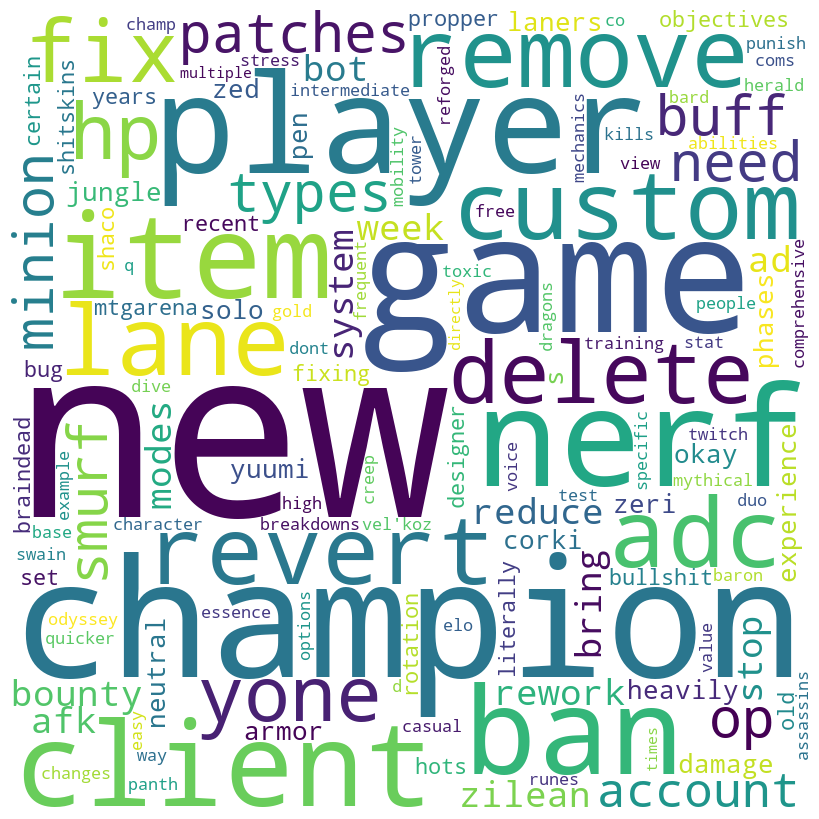

In [ ]:

wordcloud_string2 = ' '.join([phrase for phrase, _ in common_phrases])

wordcloud2 = WordCloud(width = 1920, height = 1080, 
                background_color ='white', 
                stopwords = STOP_WORDS, 
                min_font_size = 10).generate(wordcloud_string2)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud2) 
plt.axis("off") 
plt.tight_layout(pad = 0) 

plt.show()